# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dwi Fibianto
- **Email:** dwifibianto16@gmail.com
- **ID Dicoding:** dwi_fibianto_aL3h

## Menentukan Pertanyaan Bisnis

- Hari apa apa yang paling ramai dan paling sedikit untuk seseorang menyewa sepeda
- Pada musim apa sepeda ramai disewa?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Memanggil semua libarary yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca semua tabel yang ada pada day.csv dan hour.csv menggunakan pandas dan disimpan ke sebuah variabel data frame

In [2]:
# path dataset
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

In [3]:
# Menampilkan beberapa baris pertama dari setiap dataset untuk penilaian
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Penilaian data hari untuk nilai yang hilang dan tipe data
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data pada dteday yang berupa object. Seharusnya tipe data yang digunakan adalah datetime

In [6]:
# Penilaian data jam untuk nilai yang hilang dan tipe data
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama seperti data day di atas  kesalahan tipe data pada dteday yang berupa object. Seharusnya tipe data yang digunakan adalah datetime





### Assessing Data

**Insight:**
- Kita lakukan load data

In [7]:
# Penilaian data hari untuk nilai yang hilang dan tipe data
print("Info tentang data hari:")
day_data.info()


Info tentang data hari:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Memeriksa apakah ada duplikasi dalam data hari
day_duplicates = day_data.duplicated().sum()
print(f"\nJumlah duplikasi dalam data hari: {day_duplicates}")


Jumlah duplikasi dalam data hari: 0


In [9]:
# Penilaian data jam untuk nilai yang hilang dan tipe data
print("\nInfo tentang data jam:")
hour_data.info()


Info tentang data jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Cek missing value pada day_df
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
# Cek missing value pada day_df
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada missing value pada kedua data tersebut

In [12]:
# Memeriksa apakah ada duplikasi dalam data jam
hour_duplicates = hour_data.duplicated().sum()
print(f"\nJumlah duplikasi dalam data jam: {hour_duplicates}")


Jumlah duplikasi dalam data jam: 0


### Cleaning Data

**Insight:**
- Membersihkan data yang tidak diperlukan dari file day.csv
- Membersihkan duplikasi
- Memeriksa nilai yang hilang dari dataset

In [13]:
# Mengonversi 'dteday' menjadi format datetime di kedua dataset
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])


In [14]:
# Verifikasi bahwa konversi 'dteday' berhasil
print("\nKolom 'dteday' setelah konversi menjadi datetime:")
print(day_data.dtypes['dteday'], hour_data.dtypes['dteday'])


Kolom 'dteday' setelah konversi menjadi datetime:
datetime64[ns] datetime64[ns]


In [15]:
# Memeriksa nilai yang hilang di kedua dataset setelah konversi
print("\nNilai yang hilang dalam data hari:")
print(day_data.isnull().sum())


Nilai yang hilang dalam data hari:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengubah konversi nilai ke dalam weekday dan season

In [16]:
# Konversi nilai pada kolom weekday
day_data["weekday"] = day_data["weekday"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})
hour_data["weekday"] = hour_data["weekday"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

In [17]:
# Konversi nilai pada kolom season
day_data["season"] = day_data["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
hour_data["season"] = hour_data["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

Print ouput untuk crosscecking

In [18]:
print(day_data["weekday"])

0      Sat
1      Sun
2      Mon
3      Tue
4      Wed
      ... 
726    Thu
727    Fri
728    Sat
729    Sun
730    Mon
Name: weekday, Length: 731, dtype: object


In [19]:
print(day_data["season"])

0      Spring
1      Spring
2      Spring
3      Spring
4      Spring
        ...  
726    Spring
727    Spring
728    Spring
729    Spring
730    Spring
Name: season, Length: 731, dtype: object


**Insight:**
- Membersihkan data yang tidak diperlukan dari file hour.csv

In [20]:
print("\nNilai yang hilang dalam data jam:")
print(hour_data.isnull().sum())


Nilai yang hilang dalam data jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
# Verifikasi apakah ada duplikasi yang tersisa setelah pembersihan
day_duplicates = day_data.duplicated().sum()
hour_duplicates = hour_data.duplicated().sum()

print(f"\nSetelah pembersihan, jumlah duplikasi dalam data hari: {day_duplicates}")
print(f"Setelah pembersihan, jumlah duplikasi dalam data jam: {hour_duplicates}")


Setelah pembersihan, jumlah duplikasi dalam data hari: 0
Setelah pembersihan, jumlah duplikasi dalam data jam: 0


## Exploratory Data Analysis (EDA)

### Explore weekday


In [22]:
# Menambah kolom nama hari dalam bentuk string untuk analisis lebih mudah
day_data.groupby("weekday").cnt.sum().reset_index()

,weekday,cnt
0,Fri,487790
1,Mon,455503
2,Sat,477807
3,Sun,444027
4,Thu,485395
5,Tue,469109
6,Wed,473048


### Explore season


In [23]:
# Menambah kolom nama hari dalam bentuk string untuk analisis lebih mudah
day_data.groupby("season").cnt.sum().reset_index()

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


**Insight:**
- Explore data set day.csv untuk mencari data penyewaan sepeda harian

In [24]:
# 1. Melihat Statistik Deskriptif Data
print("Statistik Deskriptif Dataset:")
print(day_data.describe())

Statistik Deskriptif Dataset:
          instant               dteday          yr        mnth     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
min      0.000000    1.0

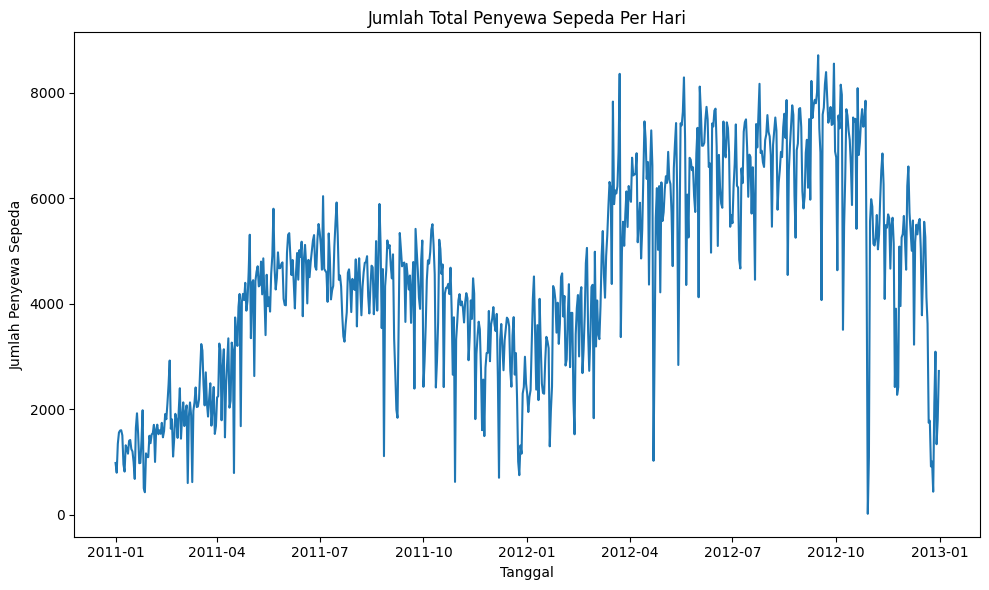

In [25]:
# 2. Jumlah penyewa sepeda per hari (total pengguna)
plt.figure(figsize=(10, 6))
plt.plot(day_data['dteday'], day_data['cnt'], label='Jumlah Total Penyewa')
plt.title('Jumlah Total Penyewa Sepeda Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
# 3. Distribusi penggunaan sepeda berdasarkan musim (season)
# Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
season_labels = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
day_data['nama_musim'] = day_data['season'].map(season_labels)

In [27]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah pengguna sepeda
# Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
winter_usage = day_data[day_data['season'] == 4]['cnt'].mean()

In [28]:
print(f"\nRata-rata penyewa sepeda di musim dingin: {winter_usage}")


Rata-rata penyewa sepeda di musim dingin: nan


In [29]:
# 4. Pengaruh cuaca terhadap penggunaan sepeda (weathersit)
# Weathersit (1: Cerah, 2: Berkabut, 3: Hujan ringan, 4: Hujan lebat)
weather_labels = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
day_data['weathersit_name'] = day_data['weathersit'].map(weather_labels)

plt.figure(figsize=(8, 6))
weather_usage = day_data.groupby('weathersit_name')['cnt'].mean().sort_values(ascending=False)
weather_usage.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Pengaruh Cuaca Terhadap Penggunaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.tight_layout()
plt.show()

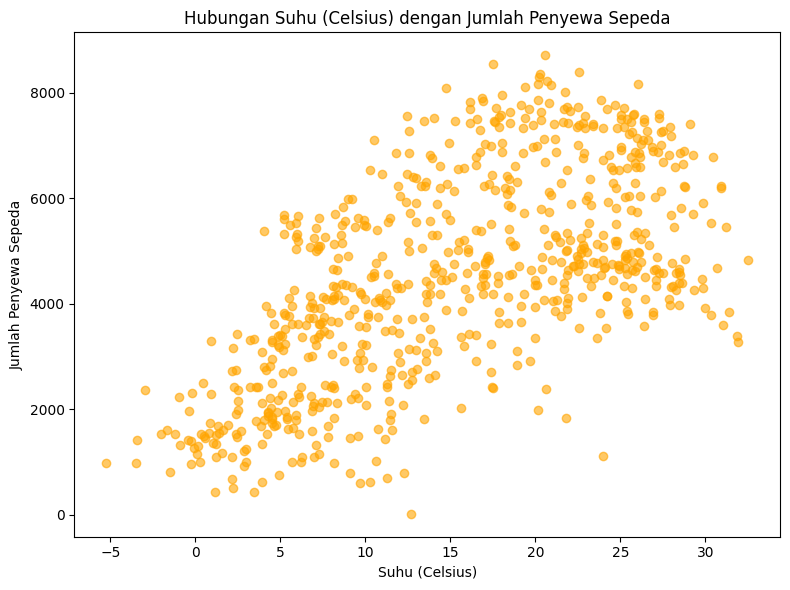

In [30]:
# Mengubah suhu yang dinormalisasi ke dalam skala Celsius
# Rentang suhu: -8°C sampai 39°C
day_data['temp_celsius'] = day_data['temp'] * (39 - (-8)) + (-8)

# Visualisasi hubungan antara suhu dalam Celsius dan jumlah penyewa sepeda
plt.figure(figsize=(8, 6))
plt.scatter(day_data['temp_celsius'], day_data['cnt'], color='orange', alpha=0.6)
plt.title('Hubungan Suhu (Celsius) dengan Jumlah Penyewa Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.tight_layout()
plt.show()


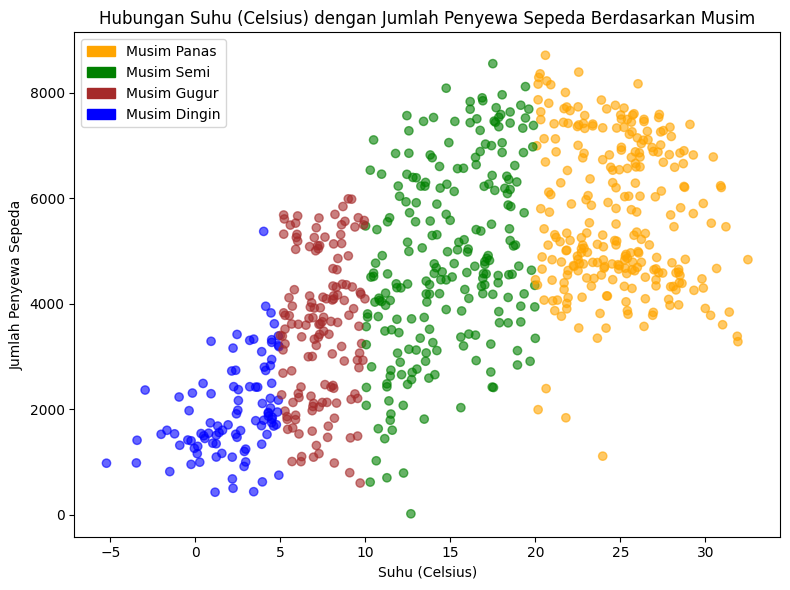

In [31]:
# Mengubah suhu yang dinormalisasi ke dalam skala Celsius
day_data['temp_celsius'] = day_data['temp'] * (39 - (-8)) + (-8)

# Menambahkan kolom musim berdasarkan skala suhu
def categorize_season(temp):
    if temp >= 20:
        return 'Musim Panas'
    elif 10 <= temp < 20:
        return 'Musim Semi'
    elif 5 <= temp < 10:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

day_data['season_by_temp'] = day_data['temp_celsius'].apply(categorize_season)

# Visualisasi hubungan antara suhu dalam Celsius dan jumlah penyewa sepeda, termasuk skala musim
plt.figure(figsize=(8, 6))
plt.scatter(day_data['temp_celsius'], day_data['cnt'], c=day_data['season_by_temp'].map({
    'Musim Panas': 'orange', 'Musim Semi': 'green', 'Musim Gugur': 'brown', 'Musim Dingin': 'blue'
}), alpha=0.6)
plt.title('Hubungan Suhu (Celsius) dengan Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewa Sepeda')

# Menambahkan legenda untuk musim
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='orange', label='Musim Panas'),
    mpatches.Patch(color='green', label='Musim Semi'),
    mpatches.Patch(color='brown', label='Musim Gugur'),
    mpatches.Patch(color='blue', label='Musim Dingin')
]
plt.legend(handles=legend_handles)

plt.tight_layout()
plt.show()


**Insight:**
- Hasil visualiasi data menunjukkan bahwa pada suhu di musim kemarau, panas terdapat banyak penyewa ditunjukkan pada visualisasi data di atas

## Visualization & Explanatory Analysis

### # 1. Hari apa yang paling ramai dan paling sedikit untuk seseorang menyewa sepeda?

In [32]:
# Mengelompokkan data berdasarkan hari dan menghitung rata-rata jumlah pengguna sepeda
day_usage_by_day = day_data.groupby('weekday')['cnt'].mean().sort_values(ascending=False)

In [33]:
print("Rata-rata jumlah penyewa sepeda per hari:")
print(day_usage_by_day)

Rata-rata jumlah penyewa sepeda per hari:
weekday
Fri    4690.288462
Thu    4667.259615
Sat    4550.542857
Wed    4548.538462
Tue    4510.663462
Mon    4338.123810
Sun    4228.828571
Name: cnt, dtype: float64


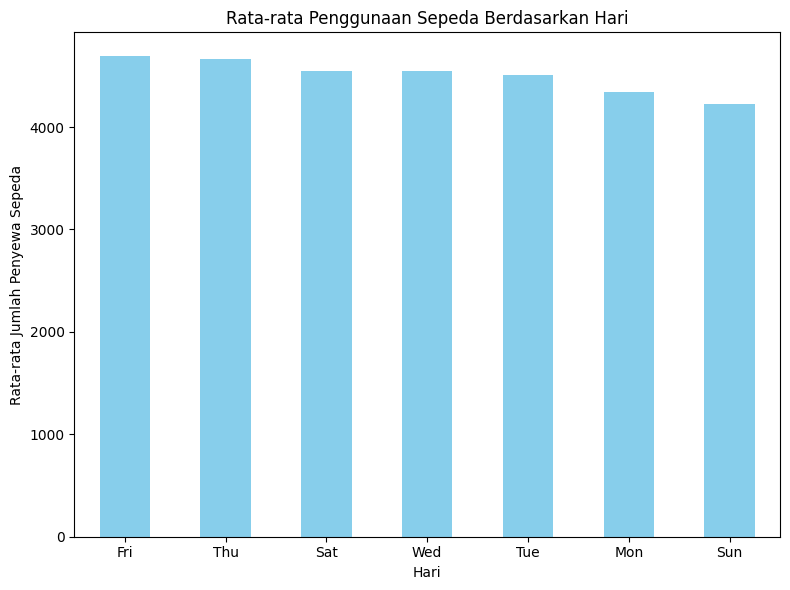

In [34]:
# Menampilkan visualisasi penggunaan sepeda per hari
plt.figure(figsize=(8, 6))
day_usage_by_day.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###  2. Pada musim apa sepeda ramai disewa?

In [35]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah pengguna sepeda
season_usage = day_data.groupby('season')['cnt'].mean().sort_values(ascending=False)

In [36]:
# Mapping season numbers to names
#season_labels = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
#season_usage.index = season_usage.index.map(season_labels)

In [37]:
print("\nRata-rata penyewa sepeda berdasarkan musim:")
print(season_usage)


Rata-rata penyewa sepeda berdasarkan musim:
season
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64


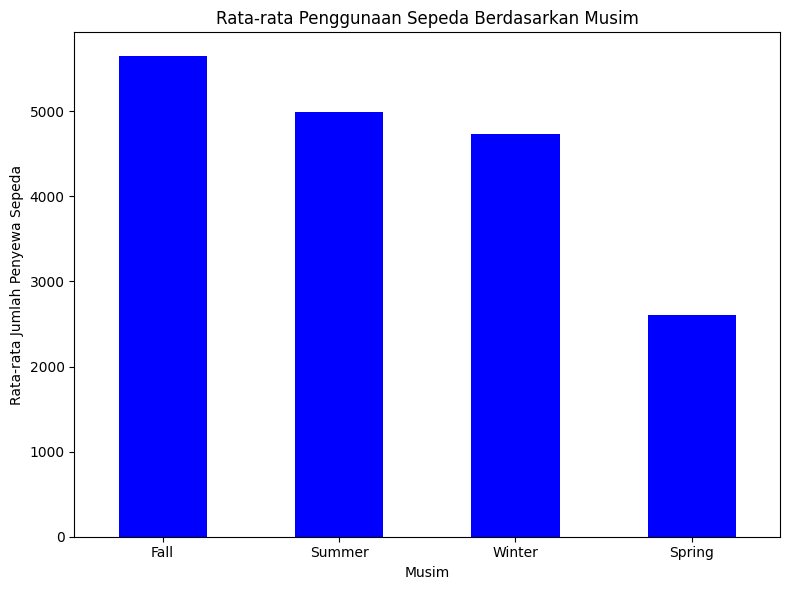

In [38]:
# Menampilkan visualisasi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
season_usage.plot(kind='bar', color='blue')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- Pada visualisasi data yang ditunjukan bahwa penyewa sepeda paling ramai terdapat pada musim gugur, panas, dingin dan terendah yaitu musim semi
- Serta pada hari kerja antara monday sampai friday sangat ramai penyewa sepeda dibanding di hari monday



## Analisis Lanjutan (Opsional)

In [40]:
# Mengubah suhu yang dinormalisasi ke Celsius
day_data['temp_celsius'] = day_data['temp'] * (39 - (-8)) + (-8)

# Mengambil fitur yang akan digunakan untuk clustering (suhu dan jumlah penyewa sepeda)
data = day_data[['temp_celsius', 'cnt']].values

In [41]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [42]:
# Fungsi untuk K-Means clustering
def kmeans(data, k, max_iterations=100):
    # Inisialisasi centroid secara acak (mengambil k data point secara acak)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    # Variabel untuk menyimpan cluster assignment (cluster mana setiap point berada)
    clusters = np.zeros(data.shape[0])

    # Mulai iterasi
    for _ in range(max_iterations):
        # Assign setiap data point ke centroid terdekat
        for i, point in enumerate(data):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # Simpan centroid lama sebelum diperbarui
        old_centroids = centroids.copy()

        # Perbarui posisi centroid: hitung rata-rata titik-titik yang berada dalam setiap cluster
        for cluster in range(k):
            points_in_cluster = data[clusters == cluster]
            if points_in_cluster.shape[0] > 0:  # Hindari pembagian oleh nol jika cluster kosong
                centroids[cluster] = np.mean(points_in_cluster, axis=0)

        # Jika centroid tidak berubah, hentikan iterasi
        if np.all(centroids == old_centroids):
            break

    return clusters, centroids


In [43]:
# Melakukan clustering dengan k = 3 (misalnya)
k = 3
clusters, centroids = kmeans(data, k)

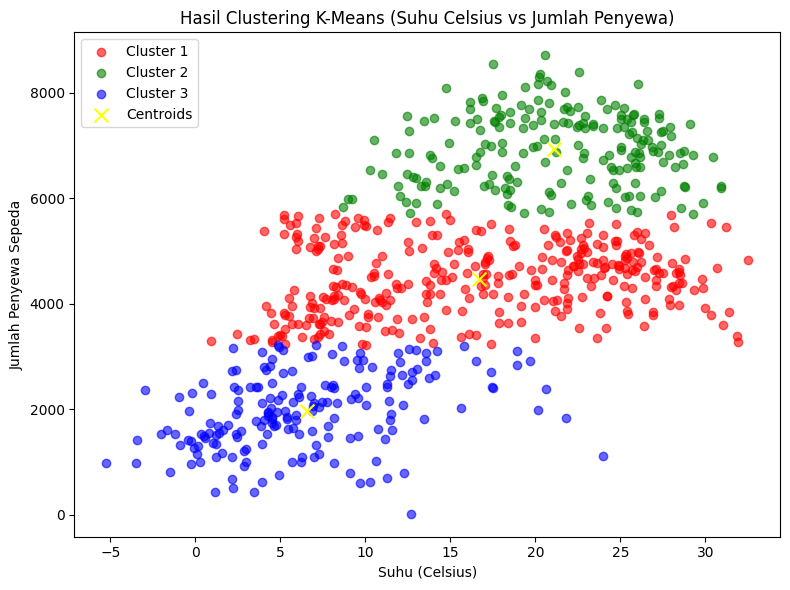

In [44]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for cluster in range(k):
    points_in_cluster = data[clusters == cluster]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=colors[cluster], label=f'Cluster {cluster + 1}', alpha=0.6)

# Visualisasi centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='yellow', marker='x', s=100, label='Centroids')

plt.title('Hasil Clustering K-Means (Suhu Celsius vs Jumlah Penyewa)')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Mengubah suhu yang dinormalisasi ke Celsius
day_data['temp_celsius'] = day_data['temp'] * (39 - (-8)) + (-8)

# Mengambil fitur yang akan digunakan untuk grouping (suhu dan jumlah penyewa sepeda)
data = day_data[['temp_celsius', 'cnt']].copy()

In [46]:
### 1. Manual Grouping (Berdasarkan Kriteria Bisnis)
# Mengelompokkan suhu ke dalam kategori: Dingin, Sedang, Panas
def manual_grouping_temp(temp):
    if temp < 10:
        return 'Dingin'
    elif 10 <= temp < 25:
        return 'Sedang'
    else:
        return 'Panas'

In [47]:
# Mengelompokkan jumlah penyewa ke dalam kategori: Rendah, Sedang, Tinggi
def manual_grouping_cnt(cnt):
    if cnt < 1000:
        return 'Rendah'
    elif 1000 <= cnt < 3000:
        return 'Sedang'
    else:
        return 'Tinggi'

In [48]:
# Menerapkan manual grouping pada dataset
data['temp_category'] = data['temp_celsius'].apply(manual_grouping_temp)
data['cnt_category'] = data['cnt'].apply(manual_grouping_cnt)

In [49]:
# Menampilkan hasil grouping manual
print(data[['temp_celsius', 'temp_category', 'cnt', 'cnt_category']].head())

   temp_celsius temp_category   cnt cnt_category
0      8.175849        Dingin   985       Rendah
1      9.083466        Dingin   801       Rendah
2      1.229108        Dingin  1349       Sedang
3      1.400000        Dingin  1562       Sedang
4      2.666979        Dingin  1600       Sedang


In [50]:
### 2. Binning (Pengelompokan Data ke dalam Kategori)
# Binning Suhu ke dalam 3 kategori
bins_temp = [-np.inf, 10, 25, np.inf]  # Batas binning
labels_temp = ['Dingin', 'Sedang', 'Panas']
data['temp_binned'] = pd.cut(data['temp_celsius'], bins=bins_temp, labels=labels_temp)

In [51]:
# Binning Jumlah Penyewa ke dalam 3 kategori
bins_cnt = [-np.inf, 1000, 3000, np.inf]  # Batas binning
labels_cnt = ['Rendah', 'Sedang', 'Tinggi']
data['cnt_binned'] = pd.cut(data['cnt'], bins=bins_cnt, labels=labels_cnt)

In [52]:
# Menampilkan hasil binning
print(data[['temp_celsius', 'temp_binned', 'cnt', 'cnt_binned']].head())

   temp_celsius temp_binned   cnt cnt_binned
0      8.175849      Dingin   985     Rendah
1      9.083466      Dingin   801     Rendah
2      1.229108      Dingin  1349     Sedang
3      1.400000      Dingin  1562     Sedang
4      2.666979      Dingin  1600     Sedang


In [53]:
# Visualisasi Hasil Manual Grouping dan Binning
# Visualisasi distribusi suhu berdasarkan kategori manual dan binning
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

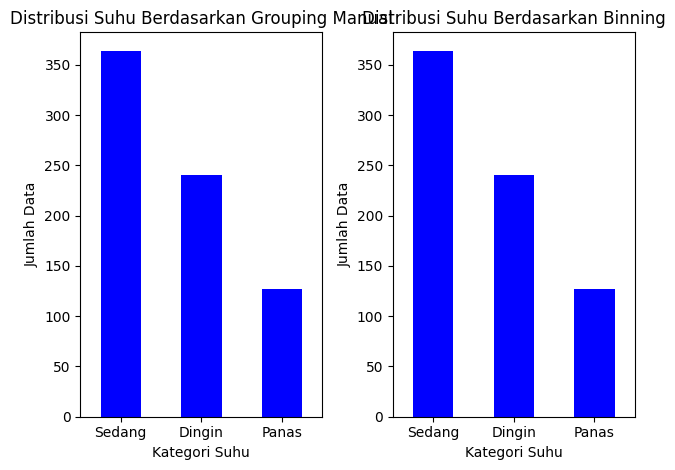

In [54]:
plt.subplot(1, 2, 1)
manual_counts = data['temp_category'].value_counts()
manual_counts.plot(kind='bar', color='blue')
plt.title('Distribusi Suhu Berdasarkan Grouping Manual')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
binned_counts = data['temp_binned'].value_counts()
binned_counts.plot(kind='bar', color='blue')
plt.title('Distribusi Suhu Berdasarkan Binning')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

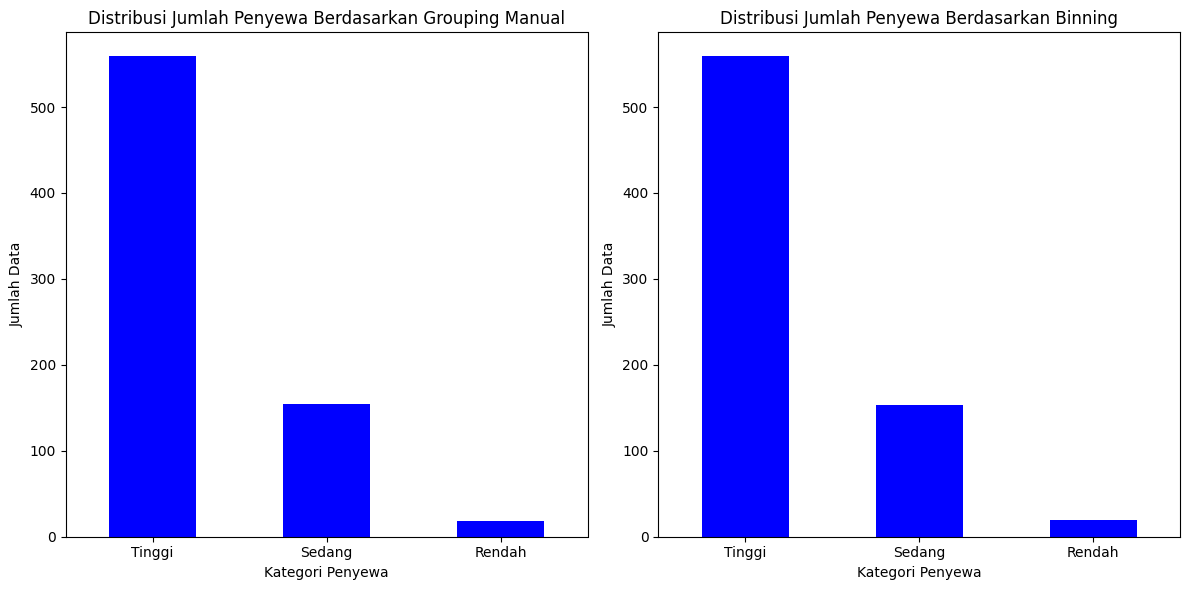

In [55]:
# Visualisasi distribusi jumlah penyewa berdasarkan kategori manual dan binning
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
manual_cnt_counts = data['cnt_category'].value_counts()
manual_cnt_counts.plot(kind='bar', color='blue')
plt.title('Distribusi Jumlah Penyewa Berdasarkan Grouping Manual')
plt.xlabel('Kategori Penyewa')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
binned_cnt_counts = data['cnt_binned'].value_counts()
binned_cnt_counts.plot(kind='bar', color='blue')
plt.title('Distribusi Jumlah Penyewa Berdasarkan Binning')
plt.xlabel('Kategori Penyewa')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Berdasarkan analisis clustering, grouping dan binning di atas Penyewaan paling banyak dilakukan pada saat suhu normal dan tinggi yaitu 15-30 celcius musim semi dan panas karena sangat nyaman untuk berkendara dibanding musim dingin

## Conclusion

- 1. Hari apa yang paling ramai dan paling sedikit untuk seseorang menyew sepeda?
Berdasarkan analisis yang saya lakukan penyewaan paling ramai di hari kerja khususnya di hari senin(monday) sampai jumat(friday) menunjukan bahwa weekday banyak pengguna sepeda. Sebaliknya hari yang paling sepi penyewa yaitu di hari weekend atau sabtu sampai minggu.

- 2. Pada musim apa sepeda ramai disewa?
Dari analisis yang saya lakukan, berdasarkan data yang saya olah musim semi(fall) dan musim panas(summer) adalah musim yang ramai sepeda untuk disewa karena cuaca sangat nyaman dan mendukung kegiatan bersepeda.

Secara keseluruhan, penyewaan sepeda cenderung lebih ramai pada hari weekday senin sampai jumat dibandingkan weekend sabtu dan minggu, terutama pada musim panas dan musim semi yang memiliki kondisi cuaca yang mendukung. Musim dingin, dengan suhu yang lebih rendah, menyebabkan penurunan jumlah penyewa sepeda secara signifikan karena cuaca dan suhu tidak nyaman untuk pengendara sepeda.
